#Laporan Proyek Machine Learning - Putu Gio Satria Adinata

##Data Loading

###Import Library

In [1]:
#Impor Library
import kagglehub
import shutil
import os
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from ast import literal_eval # Untuk mengubah string list menjadi list aktual
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dot, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import missingno as msno # Untuk visualisasi missing values
from wordcloud import WordCloud

%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.utils import shuffle
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split

print("Semua Library berhasil diimpor.")

Semua Library berhasil diimpor.


###Download Dataset
Peneliti mengambil dataset dari Kaggle yakni Spotify dataset: A Comprehensive Collection of Spotify Tracks Across Various Genres yang diupload oleh Gati Ambaliya. Datasetnya dapat dilihat pada tautan ini https://www.kaggle.com/datasets/ambaliyagati/spotify-dataset-for-playing-around-with-sql


In [2]:
import kagglehub

# Download latest version
df = kagglehub.dataset_download("ambaliyagati/spotify-dataset-for-playing-around-with-sql")

print("Path to dataset files:", df)

Path to dataset files: /kaggle/input/spotify-dataset-for-playing-around-with-sql


In [3]:
df = pd.read_csv('/kaggle/input/spotify-dataset-for-playing-around-with-sql/spotify_tracks.csv')

###Reading Data

Pada tahap ini peneliti akan membaca dataset yang sudah kita ambil dari Kaggle

In [4]:
df.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


In [5]:
print('Jumlah data track \t\t: ', len(df.name.unique()))
print('Jumlah data artist \t\t: ', len(df.artists.unique()))
print('Jumlah data album \t\t: ', len(df.album.unique()))
print('Jumlah data popularity \t\t: ', len(df.popularity.unique()))
print('Jumlah data genre \t\t: ', len(df.genre.unique()))

Jumlah data track 		:  4518
Jumlah data artist 		:  4651
Jumlah data album 		:  4949
Jumlah data popularity 		:  90
Jumlah data genre 		:  126


Berdasarkan varibel-variabel dataset di atas, peneliti cukup mengambil variabel sesuai kebutuhan analisis dan pelatihan model pada proyek ini yakni name, artists, album, popularity, genre

##Exploratory Data Analysis (EDA)

###Univariate Analysis

Analisis univariat merupakan bagian fundamental dari Analisis Data Eksploratori (EDA), di mana Anda menganalisis satu variabel pada satu waktu. Tujuannya utama adalah untuk memahami distribusi nilai, mengidentifikasi kecenderungan pusat, mengukur penyebaran, dan mendeteksi anomali atau pola dalam variabel tunggal tersebut, tanpa mempertimbangkan hubungan dengan variabel lain.

Kode di bawah melakukan dua visualisasi data terkait popularitas lagu dan artis menggunakan pustaka Matplotlib dan Seaborn. Pertama, kode menghasilkan histogram distribusi skor popularitas lagu dari seluruh dataset. Histogram ini menunjukkan seberapa sering rentang skor popularitas tertentu muncul, dengan tambahan kurva KDE (Kernel Density Estimate) untuk memperhalus gambaran distribusi. Sumbu X merepresentasikan skor popularitas, dan sumbu Y adalah frekuensi atau jumlah lagu.

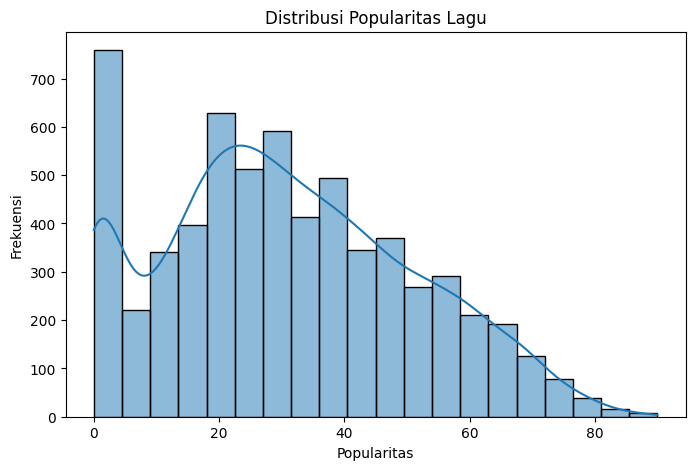

<ipython-input-6-0c0f4a3d01bc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='popularity', y='artists', data=top_artists, palette='pastel')


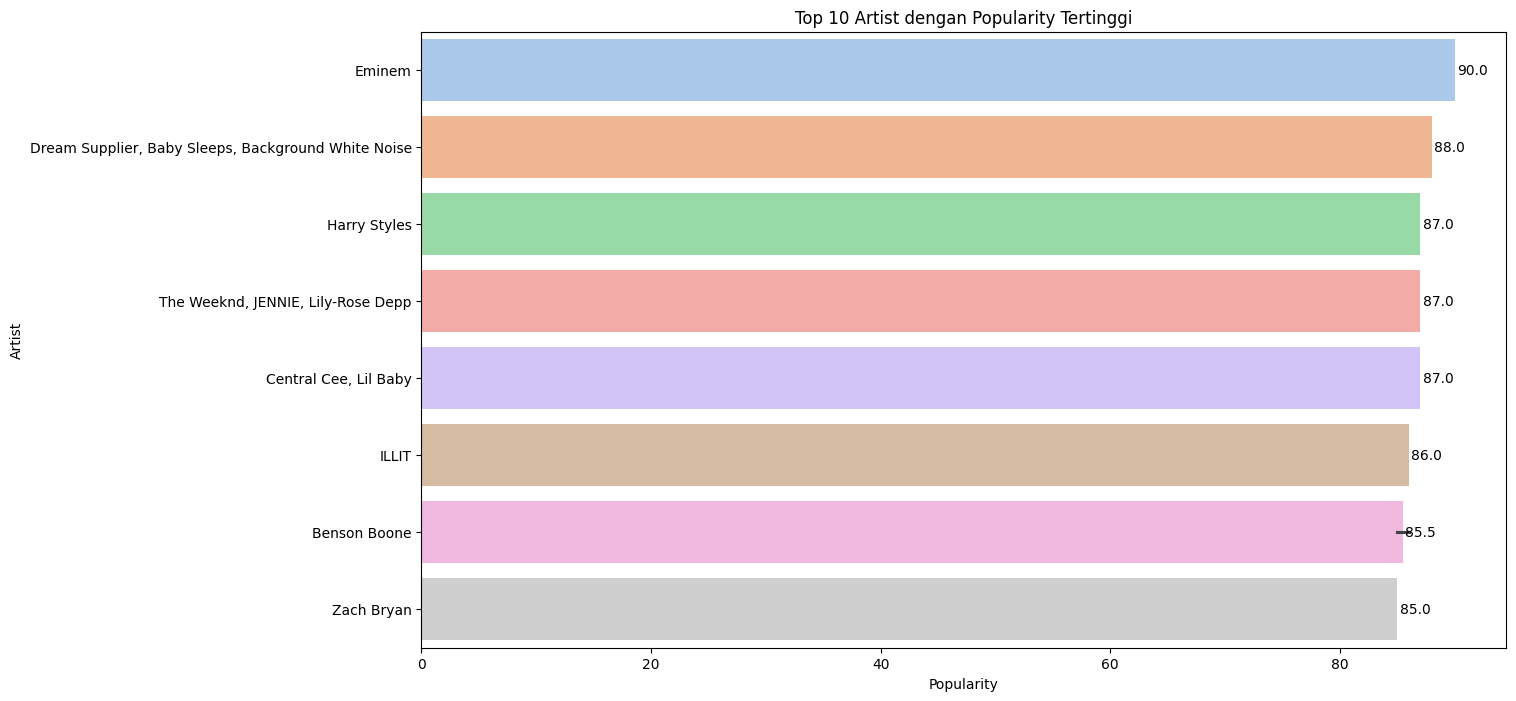

In [6]:
# Popularity Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['popularity'], kde=True, bins=20)
plt.title('Distribusi Popularitas Lagu')
plt.xlabel('Popularitas')
plt.ylabel('Frekuensi')
plt.show()

top_artists = df.sort_values(by='popularity', ascending=False).head(10)
plt.figure(figsize=(14, 8))
plot = sns.barplot(x='popularity', y='artists', data=top_artists, palette='pastel')
plt.title('Top 10 Artist dengan Popularity Tertinggi')
plt.xlabel('Popularity')
plt.ylabel('Artist')
for i in plot.patches:
    plot.text(i.get_width() + 0.2, i.get_y() + i.get_height()/2, str(round(i.get_width(), 2)), fontsize=10, color='black', ha='left', va='center')
plt.show()

<ipython-input-7-aad0292d648c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


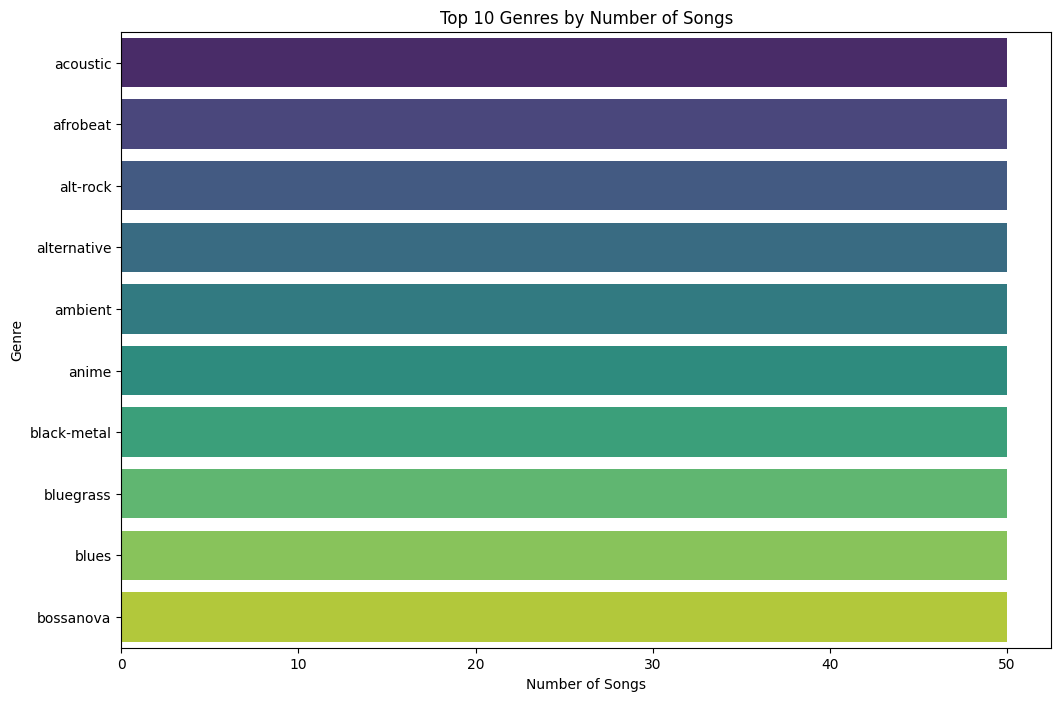

In [7]:
# Top 10 Genres by Number of Songs
top_genres = df['genre'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()

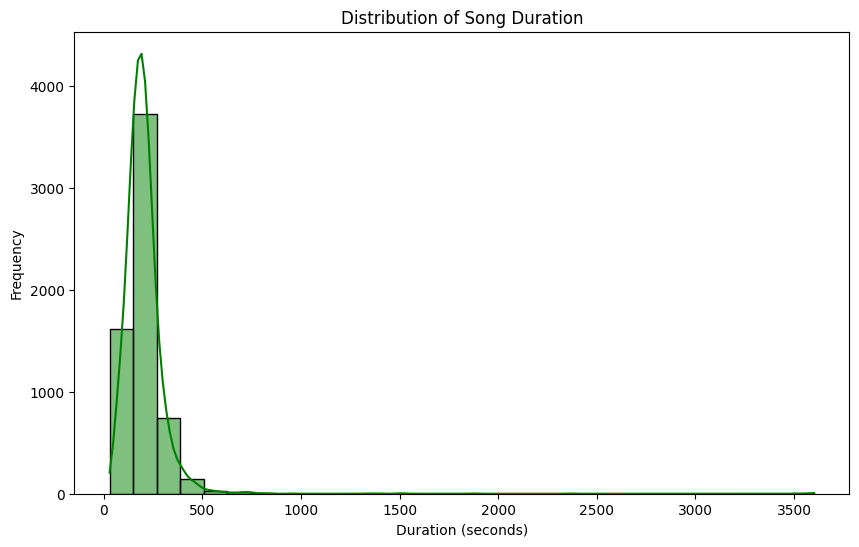

In [8]:
# Distribution of Song Duration
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_ms'] / 1000, bins=30, kde=True, color='green')
plt.title('Distribution of Song Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

Dari gambar di atas, sebagian besar lagu memiliki durasi yang relatif pendek hingga sedang. Puncak tertinggi (modus) dari distribusi ini tampaknya berada di sekitar 200-250 detik (sekitar 3-4 menit), yang merupakan durasi umum untuk lagu-lagu populer.

###Bivariate Analysis

Kode di bawah digunakan untuk melakukan analisis bivariat dengan membuat scatter plot yang bertujuan untuk melihat hubungan antara dua variabel numerik: durasi lagu dan popularitas lagu. Setiap titik pada plot mewakili satu lagu. Posisi horizontal titik ditentukan oleh durasi lagu (dalam detik, setelah dikonversi dari milidetik), dan posisi vertikalnya ditentukan oleh skor popularitas lagu tersebut.

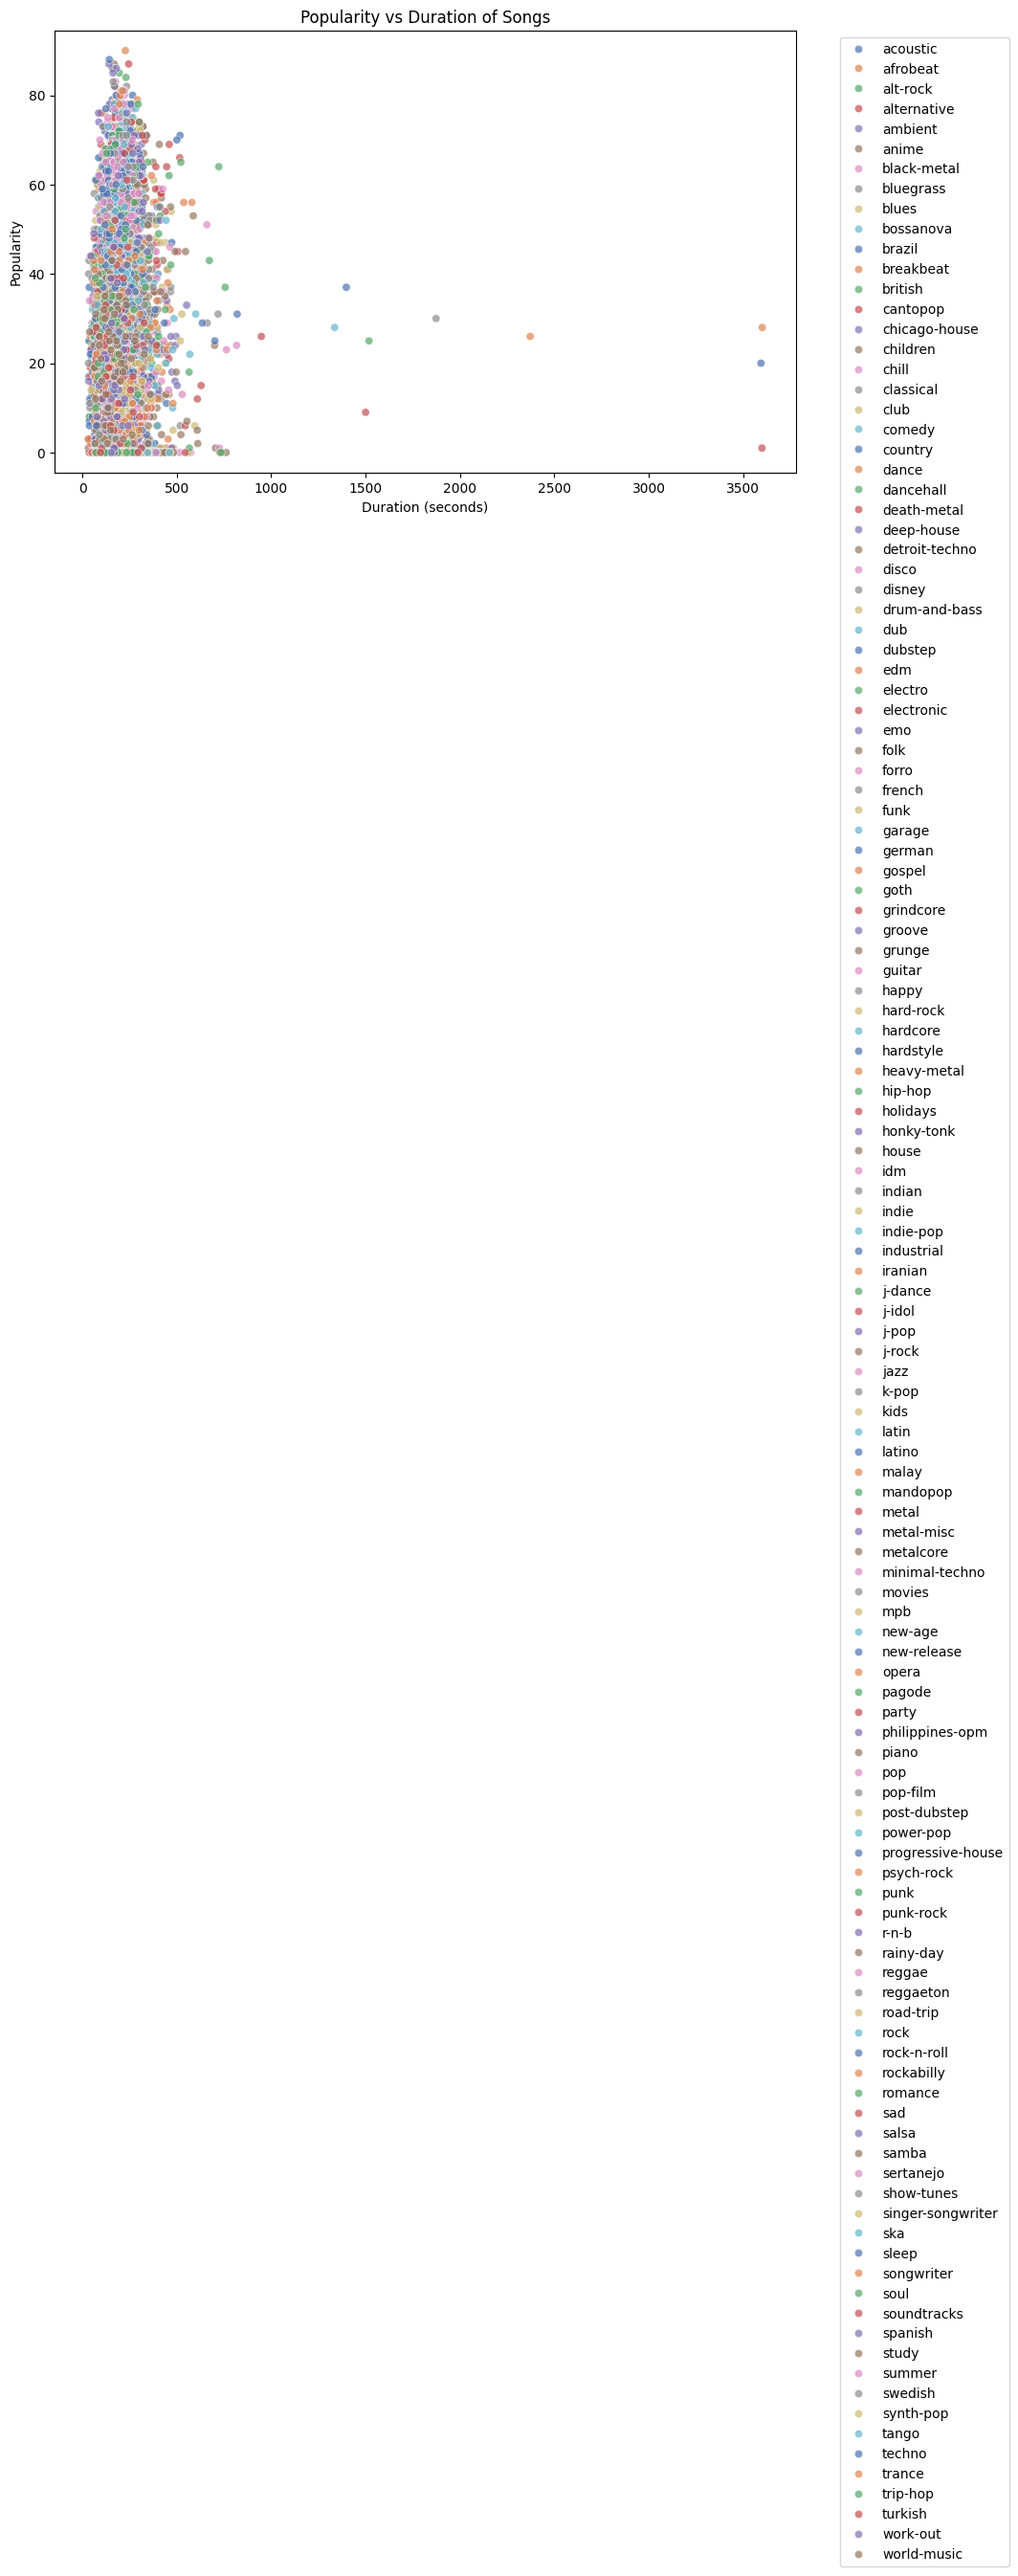

In [9]:
# Scatter plot of Popularity vs Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['duration_ms'] / 1000, y=df['popularity'], hue=df['genre'], palette='deep', alpha=0.7)
plt.title('Popularity vs Duration of Songs')
plt.xlabel('Duration (seconds)')
plt.ylabel('Popularity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Sebagian besar lagu terkonsentrasi di area kiri plot, menunjukkan bahwa mayoritas lagu memiliki durasi yang relatif pendek (umumnya di bawah sekitar 500-750 detik atau sekitar 8-12 menit, dengan kepadatan tertinggi pada durasi yang lebih pendek lagi, mungkin sekitar 150-300 detik atau 2.5-5 menit). Popularitas lagu-lagu dalam klaster utama ini bervariasi dari rendah hingga sangat tinggi.

##Data Preparation

###Mengambil Fitur Sesuai Kebutuhan

Pada tahap ini, kita hanya mengambil beberapa fitur atau kolom dari variabel movies sesuai kebutuhan analsis pengolahan data yakni id, name, genre, artists, album, popularity

In [10]:
# Menghapus beberapa fitur dari DataFrame
features_to_drop = ['duration_ms', 'explicit']
df_clean = df.drop(columns=features_to_drop)

# Memeriksa DataFrame setelah fitur dihapus
df = df_clean
df.head()

,id,name,genre,artists,album,popularity
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33


In [11]:
df_clean = df[['name', 'artists', 'genre']].drop_duplicates(subset='name', keep='first')

###Menangani Nilai Kosong (Missing Value)

Pada tahap ini peneliti akan melakukan pengecekan nilai kosong pada variabel dataset

In [12]:
df.isnull().sum()

,0
id,0
name,0
genre,0
artists,0
album,0
popularity,0


Dari hasil di atas, semua kolom tidak memiliki nilai kosong dan bisa melanjutkan ke tahap berikutnya

###Menangani Duplikat Data

Pada tahap ini peneliti akan melakukan pengecekan duplikat data pada variabel dataset

In [13]:
df.duplicated().sum()

np.int64(0)

Dari hasil di atas, semua kolom tidak memiliki data yang terduplikat dan bisa melanjutkan ke tahap berikutnya

###Data Preprocessing

####Mengurutkan data berdasarkan Popularity

In [14]:
unique_popularity = df['popularity'].unique()
unique_popularity.sort()
unique_popularity

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 90])

####Menampilkan nilai unik dari kolom 'genre'

In [15]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(df['genre'].value_counts())

genre
acoustic             50
afrobeat             50
alt-rock             50
alternative          50
ambient              50
anime                50
black-metal          50
bluegrass            50
blues                50
bossanova            50
brazil               50
breakbeat            50
british              50
cantopop             50
chicago-house        50
children             50
chill                50
classical            50
club                 50
comedy               50
country              50
dance                50
dancehall            50
death-metal          50
deep-house           50
detroit-techno       50
disco                50
disney               50
drum-and-bass        50
dub                  50
dubstep              50
edm                  50
electro              50
electronic           50
emo                  50
folk                 50
forro                50
french               50
funk                 50
garage               50
german               50
gospel    

##Content Based Filtering (CBF)

###A. Data Preparation

Tahap ini fokus pada pengolahan fitur atau atribut dari item itu sendiri. Proses utamanya meliputi pembersihan data teks, ekstraksi fitur (seperti TF-IDF untuk mengubah teks menjadi vektor numerik), dan penggabungan berbagai fitur menjadi satu profil komprehensif untuk setiap item.

In [16]:
# Membuat instance dari TfidfVectorizer
tfidf = TfidfVectorizer()

# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tfidf.fit_transform(df['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(6300, 129)

Kode di atas menginisialisasi sebuah TfidfVectorizer yang kemudian digunakan untuk mengubah data tekstual dari kolom 'genre' dalam DataFrame df menjadi representasi numerik dalam bentuk matriks TF-IDF. Proses fit_transform pertama-tama mempelajari seluruh kosakata unik dari semua genre dan menghitung bobot IDF-nya, lalu mengubah setiap teks genre menjadi vektor skor TF-IDF. Hasilnya, tfidf_matrix adalah matriks di mana baris mewakili lagu dan kolom mewakili kata unik dari kosakata genre, dengan nilai sel berupa skor TF-IDF. Perintah tfidf_matrix.shape akan menunjukkan jumlah lagu dan jumlah kata unik (fitur) yang berhasil diekstrak dari data genre tersebut. Matriks ini kemudian siap digunakan untuk langkah selanjutnya dalam CBF, seperti menghitung kemiripan antar lagu berdasarkan profil genre mereka.

In [17]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.70710678],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.70710678],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.70710678]])

Kode tfidf_matrix.todense() mengubah matriks TF-IDF, yang awalnya disimpan dalam format sparse (hemat memori dengan hanya menyimpan nilai non-nol), menjadi format dense (matriks padat). Dalam matriks padat ini, semua elemen, termasuk skor TF-IDF nol, akan disimpan secara eksplisit.

In [18]:
# Membuat dataframe untuk tf-idf matrix
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf.get_feature_names_out(),
    index=df.name
)

,acoustic,afrobeat,age,alt,alternative,ambient,and,anime,bass,black,...,synth,tango,techno,tonk,trance,trip,tunes,turkish,work,world
name,,,,,,,,,,,,,,,,,,,,,
Acoustic,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Acoustic,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Here Comes the Sun - Acoustic,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Acoustic #3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
My Love Mine All Mine - Acoustic Instrumental,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Voyage to Atlantis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
L'Oiseau,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
The Daintree,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107


###B. Modeling

Pada tahap ini, "model" seringkali berupa representasi item dalam bentuk vektor dan matriks kemiripan antar item. Setelah item diubah menjadi vektor (misalnya, vektor TF-IDF), kemiripan antar item dihitung (umumnya menggunakan cosine similarity). Matriks kemiripan inilah yang menjadi dasar untuk membuat rekomendasi.

In [19]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

cosine_sim_df = pd.DataFrame(
    cosine_sim,
    index=df['name'],
    columns=df['name']
)

# Melihat similarity matrix pada setiap lagu
cosine_sim_df.sample(25, axis=1).sample(25, axis=0)

name,Jaguar,Save Yourself - Japanese Version,K-POP,Malayo Pa Ang Umaga,Deixa Acontecer,POP,Acoustic,"Situation - 12"" Mix",Enter the Multiverse,Blues in Velvet Room,...,Acoustic,Rock Steady,Children of the Korn (feat. Ice Cube),Reggaetón Lento (Bailemos),Turkish Cotton,As It Was,Swedish,Georgia Rhythm,Bonanza Main Tv Show Theme,Skateboard P (Mixtape)
name,,,,,,,,,,,,,,,,,,,,,
Piano Man,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Jazz,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Groove Is in the Heart - Remix Version,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
K-POP - Instrumental,0.00000,0.000000,1.0,0.0,0.0,1.0,0.0,0.555681,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Minimal Illusion (Extended),0.39817,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Clandestina (feat. Emma Peters) - Cocaina Remix,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Chitty Chitty Bang Bang: Chitty Chitty Bang Bang,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0
Hunger of the Pine,0.00000,0.555681,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.555681,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
HARDSTYLE DRILL 2009 NOKIA ANGELZ 1.6,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Kode di atas melakukan tahap inti dalam pemodelan Content-Based Filtering dengan menghitung matriks kemiripan (similarity matrix) antar semua lagu menggunakan metrik cosine similarity pada matriks TF-IDF yang sudah ada.

In [20]:
def song_recommendations(nama_lagu, similarity_data=cosine_sim_df, items=df[['name', 'genre']], k=5):
    index = similarity_data.loc[:,nama_lagu].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_lagu agar nama lagu yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_lagu, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Fungsi song_recommendations ini bertujuan untuk menghasilkan daftar rekomendasi lagu berdasarkan kemiripan konten dengan lagu yang diberikan sebagai input (nama_lagu)

###C. Pengujian Sistem Rekomendasi

Pada tahap ini pengujian dilakukan dengan memberikan satu item sebagai input Sistem kemudian akan menggunakan matriks kemiripan untuk menemukan item-item lain yang paling mirip dengan input tersebut dan menampilkannya sebagai rekomendasi.

In [21]:
df['artists']

,artists
0,Billy Raffoul
1,Billy Raffoul
2,"Molly Hocking, Bailey Rushlow"
3,The Goo Goo Dolls
4,"Guus Dielissen, Casper Esmann"
...,...
6295,Future World Music
6296,"Putumayo, Marianne Perrudin, Thomas Artaud"
6297,Joseph Tawadros
6298,Future World Music


In [22]:
# Menampilkan daftar lagu dengan artis John Denver
spotify_songs = df[df['artists'] == 'John Denver'].head()
spotify_songs

,id,name,genre,artists,album,popularity
1000,1YYhDizHx7PnDhAhko6cDS,"Take Me Home, Country Roads - Original Version",country,John Denver,"Poems, Prayers and Promises",69
1005,1QbOvACeYanja5pbnJbAmk,"Take Me Home, Country Roads",country,John Denver,"The John Denver Collection, Vol 1: Take Me Hom...",69
4973,1ne9wOtDF2jM6Cm8WBkaER,Rocky Mountain High,rock,John Denver,Rocky Mountain High,62


In [23]:
# Mendapatkan rekomendasi lagu yang mirip dengan lagu Rocky Mountain High
song_recommendations('Rocky Mountain High')

,name,genre
0,hikikomori rock,j-rock
1,Jibun ROCK,j-rock
2,Fallin' In Love,j-rock
3,Ceria,j-rock
4,Prove - Japanese Version,j-rock


Dari hasil rekomendasi di atas, TF-IDF fokus pada frekuensi kata. Jika kata "rock" (atau kata umum lainnya) muncul dalam deskripsi genre 'Rocky Mountain High' dan juga sering muncul dalam deskripsi genre lagu-lagu 'j-rock' dengan cara tertentu yang membuatnya signifikan menurut perhitungan TF-IDF, ini bisa menyebabkan kedekatan dalam ruang vektor.

###D. Evaluation

Pada tahap ini bertujuan menilai relevansi dan kualitas rekomendasi.

In [24]:
def get_recommended_song_names(input_song, similarity_data, k):
    """Mengembalikan daftar nama lagu hasil rekomendasi."""
    recommendations = song_recommendations(input_song, similarity_data, df[['name', 'genre']], k)
    return recommendations['name'].tolist()

def evaluate_recommendations(input_song, similarity_data=cosine_sim_df, k=5):
    recommended_songs = get_recommended_song_names(input_song, similarity_data, k)
    scores = similarity_data.loc[input_song, recommended_songs]
    return scores.mean() if not scores.empty else 0.0

def evaluate_precision(input_song, ground_truth, similarity_data=cosine_sim_df, k=5):
    """Menghitung precision rekomendasi berdasarkan kecocokan dengan ground truth relevan."""
    recommended_songs = get_recommended_song_names(input_song, similarity_data, k)
    relevant_songs = set(ground_truth.get(input_song, []))
    true_positives = sum(song in relevant_songs for song in recommended_songs)
    return (true_positives / k) * 100 if k > 0 else 0.0

In [25]:
input_song = 'Rocky Mountain High'

ground_truth = {
    'Rocky Mountain High': ['hikikomori rock', 'Jibun ROCK', 'Prove - Japanese Version', 'Ceria', "Fallin' In Love" ]
}

avg_sim = evaluate_recommendations(input_song, k=5)
precision = evaluate_precision(input_song, ground_truth, k=5)

print(f"Average similarity of recommended songs to '{input_song}': {avg_sim:.4f}")
print(f"Precision for recommendations of '{input_song}': {precision:.2f}%")

Average similarity of recommended songs to 'Rocky Mountain High': 1.0000
Precision for recommendations of 'Rocky Mountain High': 100.00%


Persentase presisi (0-100%). Nilai 100% berarti semua lagu yang direkomendasikan ada dalam daftar ground_truth yang relevan.

Meskipun skor sempurna terlihat bagus, dalam sistem rekomendasi nyata dengan dataset besar dan beragam, mencapai 100% presisi dan 1.0 rata-rata similaritas secara konsisten untuk semua input biasanya sulit. Hasil ini bisa menjadi indikasi bahwa untuk kasus spesifik 'Rocky Mountain High' dengan ground_truth yang Anda berikan dan fitur yang digunakan, sistem bekerja dengan sangat baik, atau ada kondisi tertentu dalam data Anda (seperti kesamaan fitur yang tinggi antar lagu tersebut) yang mengarah ke hasil ini. Maka dari itu, dilakukan pendekatan Collaborative Filtering untuk mengetahui hasil yang lebih lanjut.

##Collaborative Filtering

###A. Data Preparation

Tahap ini fokus pada pengolahan data interaksi antara pengguna dan item. Langkah utamanya adalah membuat matriks interaksi pengguna-item, memetakan ID pengguna dan item ke format numerik, dan kadang melakukan normalisasi (misalnya pada rating).

In [26]:
# Create user and song ID mappings
user_ids = df['artists'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

song_ids = df['name'].unique().tolist()
song_to_song_encoded = {x: i for i, x in enumerate(song_ids)}
song_encoded_to_song = {i: x for i, x in enumerate(song_ids)}

Kode di atas melakukan pra-pemrosesan data dengan membuat sistem pemetaan ID dua arah untuk artis (yang di sini tampaknya diperlakukan sebagai proxy untuk pengguna) dan lagu. Untuk setiap entitas (artis dan lagu), kode ini pertama-tama mengekstrak daftar nama unik dari DataFrame.

In [27]:
# Map user and song IDs to encoded values
df['user_encoded'] = df['artists'].map(user_to_user_encoded)
df['song_encoded'] = df['name'].map(song_to_song_encoded)

num_users = len(user_to_user_encoded)
num_songs = len(song_to_song_encoded)

Kode di atas melanjutkan proses pra-pemrosesan data dengan menerapkan pemetaan ID yang telah dibuat sebelumnya ke DataFrame utama dan menghitung jumlah total pengguna (artis) dan lagu unik.

In [28]:
# Scale the popularity score
min_popularity = df['popularity'].min()
max_popularity = df['popularity'].max()
df['popularity_scaled'] = df['popularity'].apply(lambda x: (x - min_popularity) / (max_popularity - min_popularity)).values

Kode di atas melakukan normalisasi Min-Max pada kolom 'popularity' di DataFrame df dan menyimpan hasilnya dalam kolom baru bernama 'popularity_scaled'.  rescaling ini mengubah rentang skor popularitas asli menjadi rentang baru antara 0 dan 1.

In [29]:
# Shuffle the data
df = shuffle(df, random_state=42)

# Split data into training and validation sets
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

Kode di atas pertama-tama mengacak urutan seluruh baris data dalam DataFrame df menggunakan fungsi shuffle untuk memastikan tidak ada bias karena urutan data asli dan untuk mendukung pembagian data yang representatif. Penggunaan random_state=42 menjamin bahwa hasil pengacakan ini konsisten setiap kali kode dijalankan. Setelah diacak, data tersebut kemudian dibagi menjadi dua bagian menggunakan train_test_split: 80% data dialokasikan sebagai train_data yang akan digunakan untuk melatih model, dan 20% sisanya dialokasikan sebagai val_data yang akan digunakan untuk menguji dan memvalidasi performa model pada data yang belum pernah dilihat sebelumnya, juga dengan random_state untuk reprodusibilitas.

###B. Modeling

Pada tahap ini, Modeling pada CF bertujuan untuk mempelajari pola preferensi pengguna dari data interaksi kolektif.

Kode di bawah mendefinisikan sebuah model jaringan saraf tiruan (neural network) menggunakan Keras (bagian dari TensorFlow) yang disebut RecommenderNet. Model ini dirancang untuk sistem rekomendasi, kemungkinan besar menggunakan pendekatan collaborative filtering berbasis matrix factorization dengan tambahan bias dan layer Dense.

In [30]:
# Keras Model Definition
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_songs, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_songs = num_songs
        self.embedding_size = embedding_size
        self.user_embedding = tf.keras.layers.Embedding(
            input_dim=num_users,
            output_dim=embedding_size,
            name="user_embedding",
        )
        self.user_bias = tf.keras.layers.Embedding(input_dim=num_users, output_dim=1, name="user_bias")
        self.song_embedding = tf.keras.layers.Embedding(
            input_dim=num_songs,
            output_dim=embedding_size,
            name="song_embedding",
        )
        self.song_bias = tf.keras.layers.Embedding(input_dim=num_songs, output_dim=1, name="song_bias")
        # Define the Dense layer here in the constructor
        self.dense_layer = tf.keras.layers.Dense(1, activation='sigmoid')


    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        song_vector = self.song_embedding(inputs[:, 1])
        song_bias = self.song_bias(inputs[:, 1])
        dot_product = tf.tensordot(user_vector, song_vector, 2)
        # Add biases
        x = dot_product + user_bias + song_bias
        x = tf.nn.sigmoid(x)
        # Call the pre-defined Dense layer
        x = self.dense_layer(x)
        return x

embedding_size = 50
model = RecommenderNet(num_users, num_songs, embedding_size)

Setelah model (RecommenderNet dalam kasus ini) didefinisikan dan diinisialisasi, langkah selanjutnya sebelum model tersebut dapat dilatih adalah mengompilasinya menggunakan metode model.compile().

In [31]:
# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [32]:
# Prepare training and validation data
X_train = train_data[['user_encoded', 'song_encoded']].values
y_train = train_data['popularity_scaled'].values
X_val = val_data[['user_encoded', 'song_encoded']].values
y_val = val_data['popularity_scaled'].values

Kode di atas mempersiapkan data input (fitur) dan output (target/label) yang akan digunakan untuk melatih dan memvalidasi model RecommenderNet. Untuk data pelatihan, X_train dibentuk dari kolom ID pengguna dan ID lagu yang sudah di-encode, sementara y_train adalah skor popularitas yang sudah dinormalisasi. Proses serupa dilakukan untuk data validasi, menghasilkan X_val dan y_val.

In [33]:
# Train the model
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=8,
    epochs=50,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.6405 - root_mean_squared_error: 0.2214 - val_loss: 0.6409 - val_root_mean_squared_error: 0.2164
Epoch 2/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.6412 - root_mean_squared_error: 0.2184 - val_loss: 0.6393 - val_root_mean_squared_error: 0.2148
Epoch 3/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.6350 - root_mean_squared_error: 0.2165 - val_loss: 0.6377 - val_root_mean_squared_error: 0.2130
Epoch 4/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.6288 - root_mean_squared_error: 0.2112 - val_loss: 0.6356 - val_root_mean_squared_error: 0.2109
Epoch 5/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.6249 - root_mean_squared_error: 0.2026 - val_loss: 0.6335 - val_root_mean_squared_error: 0.2088
Epoch 6/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.6188 - root_mean_squared_error: 0.1965 - val_loss: 0.6314 - val_root_mean_squared_error: 0.2067
Epoch 7/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step 

Dapat dilihat, hasil pelatihan memperoleh nilai mean_absolute_error: 0.5295 dan root_mean_squared_error: 0.0669


###C. Evaluation

Pada tahap ini peneliti akan melakukan visualisasi metrik seperti Mean Absolute Error (MAE) dan Root Mean Squared Error (RMSE). Kedua metrik ini sangat penting dalam mengevaluasi kinerja model prediksi. Kedua metrik ini memberikan informasi tentang seberapa baik model dapat memprediksi nilai aktual, dan visualisasi dapat membantu dalam memahami perbandingan antara keduanya serta tren kesalahan dari waktu ke waktu.

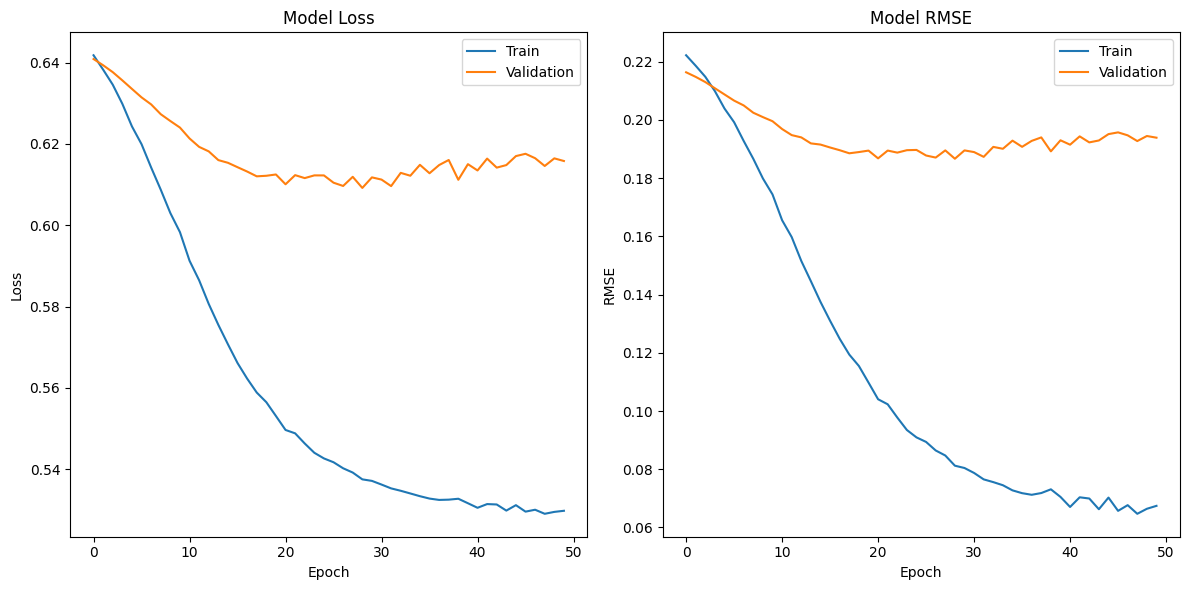

In [34]:
# Plot training and validation loss and RMSE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

Insight:
<br>
1. Model Belajar dengan Baik pada Data Pelatihan, dimana penurunan nilai loss dan RMSE pada set pelatihan menunjukkan bahwa model berhasil mempelajari pola-pola yang ada dalam data pelatihan.
2. Overfitting Terjadi, dimana perbedaan yang signifikan dan meningkat antara kinerja pada data pelatihan dan data validasi (di mana kinerja pada data pelatihan terus membaik sementara pada data validasi stagnan atau memburuk) adalah gejala klasik dari overfitting. Ini berarti model Anda mulai "menghafal" data pelatihan, termasuk noise di dalamnya, daripada mempelajari pola umum yang bisa digeneralisasi ke data baru. Akibatnya, performa model pada data yang belum pernah dilihat (data validasi) tidak sebaik performanya pada data pelatihan.
3. Epoch Optimal, dimana titik di mana kurva validasi mulai stagnan atau naik (sekitar epoch 5-15 dalam kasus ini) bisa dianggap sebagai perkiraan jumlah epoch optimal untuk pelatihan sebelum overfitting menjadi terlalu parah. Melatih lebih lama dari titik ini mungkin tidak meningkatkan kemampuan generalisasi model.

In [35]:
def cf_recommendations(artist_name, n_recommendations=10):
    artist_encoded = user_to_user_encoded.get(artist_name)
    if artist_encoded is None:
        print(f"Artist '{artist_name}' not found.")
        return pd.DataFrame()

    artist_songs = df[df['artists'] == artist_name]
    artist_songs_encoded = artist_songs['song_encoded'].tolist()

    # Cari lagu yang belum pernah didengar
    all_song_encoded = list(song_encoded_to_song.keys())
    unseen_songs_encoded = [
        song_id for song_id in all_song_encoded if song_id not in artist_songs_encoded
    ]

    artist_input = np.full((len(unseen_songs_encoded), 1), artist_encoded)
    unseen_songs_input = np.array(unseen_songs_encoded).reshape(-1, 1)
    prediction_input = np.concatenate([artist_input, unseen_songs_input], axis=1)

    # Prediksi popularitas
    predicted_popularities_scaled = model.predict(prediction_input).flatten()

    # Dataframe hasil
    unseen_songs_df = pd.DataFrame({
        'song_encoded': unseen_songs_encoded,
        'predicted_popularity_scaled': predicted_popularities_scaled
    })

    unseen_songs_df['name'] = unseen_songs_df['song_encoded'].map(song_encoded_to_song)
    df_clean = df[['name', 'artists', 'genre']].drop_duplicates(subset='name', keep='first')

    # Gabungkan info lagu ke hasil prediksi
    recommendation_df = unseen_songs_df.merge(
        df_clean,
        on='name',
        how='left'
        )
    # Ambil top N
    top_recommendations = recommendation_df.sort_values(
        by='predicted_popularity_scaled',
        ascending=False
    ).head(n_recommendations)

    return top_recommendations[['name', 'artists', 'genre', 'predicted_popularity_scaled']]

In [36]:
artist_to_recommend = 'Morgan Wallen'

cf_recommendations_df = cf_recommendations(artist_to_recommend, n_recommendations=10)

if not cf_recommendations_df.empty:
    print(f"\nRekomendasi 10 Lagu Terbaik untuk: {artist_to_recommend}")
    print('----' * 20)
    for i, row in enumerate(cf_recommendations_df.itertuples(), start=1):
        print(f"No         : {i}")
        print(f"Nama Lagu  : {row.name}")
        print(f"Artist     : {row.artists}")
        print(f"Genre      : {row.genre}")
        print(f"Skor Prediksi Popularitas: {row.predicted_popularity_scaled:.4f}")
        print('----' * 20)
artist_to_recommend = 'Morgan Wallen'

cf_recommendations_df = cf_recommendations(artist_to_recommend, n_recommendations=10)

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Rekomendasi 10 Lagu Terbaik untuk: Morgan Wallen
--------------------------------------------------------------------------------
No         : 1
Nama Lagu  : UP!
Artist     : Forrest Frank, Connor Price
Genre      : new-release
Skor Prediksi Popularitas: 0.7608
--------------------------------------------------------------------------------
No         : 2
Nama Lagu  : LALALALA
Artist     : Stray Kids
Genre      : k-pop
Skor Prediksi Popularitas: 0.7547
--------------------------------------------------------------------------------
No         : 3
Nama Lagu  : I Love Rock 'N Roll
Artist     : Joan Jett & the Blackhearts
Genre      : rock-n-roll
Skor Prediksi Popularitas: 0.7536
--------------------------------------------------------------------------------
No         : 4
Nama Lagu  : Dernière danse
Artist     : Indila
Genre      : french
Skor Prediksi Popularitas: 0.7392
--------------------------------------------------------------------------

In [38]:
final_train_rmse = history.history['root_mean_squared_error'][-1]
final_val_rmse = history.history['val_root_mean_squared_error'][-1]

print(f"Final Training RMSE: {final_train_rmse:.4f}")
print(f"Final Validation RMSE: {final_val_rmse:.4f}")

Final Training RMSE: 0.0674
Final Validation RMSE: 0.1939


Secara umum, nilai RMSE yang lebih rendah menunjukkan performa model yang lebih baik karena prediksinya lebih dekat dengan nilai aktual. Perbandingan antara Training RMSE dan Validation RMSE juga bisa memberikan indikasi apakah model mengalami overfitting (jika Training RMSE jauh lebih rendah dari Validation RMSE).